In [1]:
import numpy as np
import pandas as pd


In [3]:
df=pd.read_csv('C:/Machine Learning/ML_Datasets/ab.csv')
X=df.iloc[:,1]
Y=df.iloc[:,0]

In [7]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=42)


In [10]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
X_train_scaled=ss.fit_transform(np.array(X_train).reshape(-1,1))
X_test_scaled=ss.transform(np.array(X_test).reshape(-1,1))

In [11]:
X_train_scaled_new=np.insert(X_train_scaled,0,1,axis=1)
X_test_scaled_new=np.insert(X_test_scaled,0,1,axis=1)

In [12]:
A=X_train_scaled_new.T.dot(X_train_scaled_new)
B=np.linalg.inv(A)
C=B.dot(X_train_scaled_new.T)
beta=C.dot(Y_train)

In [13]:
Y_predict=X_test_scaled_new.dot(beta)

In [14]:
from sklearn import metrics
metrics.r2_score(Y_test,Y_predict)

0.671841073211195

In [29]:
from sklearn.preprocessing import PolynomialFeatures
pf=PolynomialFeatures(5,include_bias=False)
X5=pf.fit_transform(np.array(X).reshape(-1,1))

In [30]:
from sklearn.model_selection import train_test_split
X5_train,X5_test,Y5_train,Y5_test=train_test_split(X5,Y,test_size=0.25,random_state=42)


In [31]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
X5_train_scaled=ss.fit_transform(X5_train)
X5_test_scaled=ss.transform(X5_test)

In [32]:
X5_train_scaled_new=np.insert(X5_train_scaled,0,1,axis=1)
X5_test_scaled_new=np.insert(X5_test_scaled,0,1,axis=1)

In [34]:
A=X5_train_scaled_new.T.dot(X5_train_scaled_new)
B=np.linalg.inv(A)
C=B.dot(X5_train_scaled_new.T)
beta5=C.dot(Y5_train)

In [35]:
Y5_predict=X5_test_scaled_new.dot(beta5)

In [36]:
metrics.r2_score(Y5_test,Y5_predict)

0.997516050951709

In [63]:
from sklearn.preprocessing import PolynomialFeatures
pf=PolynomialFeatures(30,include_bias=False)
X30=pf.fit_transform(np.array(X).reshape(-1,1))

In [64]:
from sklearn.model_selection import train_test_split
X30_train,X30_test,Y30_train,Y30_test=train_test_split(X30,Y,test_size=0.25,random_state=42)


In [65]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
X30_train_scaled=ss.fit_transform(X30_train)
X30_test_scaled=ss.transform(X30_test)

In [66]:
X30_train_scaled_new=np.insert(X30_train_scaled,0,1,axis=1)
X30_test_scaled_new=np.insert(X30_test_scaled,0,1,axis=1)

In [80]:
lamda=[1e-12,1e-11,1e-10,1e-9,1e-8,1e-7,1e-6,1e-5,1e-4,1e-3,1e-2,1e-1,1,10,100,1000]
R2_score=[]
for i in range(len(lamda)):
    A=X30_train_scaled_new.T.dot(X30_train_scaled_new)
    I=np.identity(A.shape[0])
    B=np.linalg.inv(np.add(A,lamda[i]*I))
    C=B.dot(X30_train_scaled_new.T)
    beta30=C.dot(Y30_train)
    Y30_predict=X30_test_scaled_new.dot(beta30)
    R2_score.append(metrics.r2_score(Y30_test,Y30_predict))

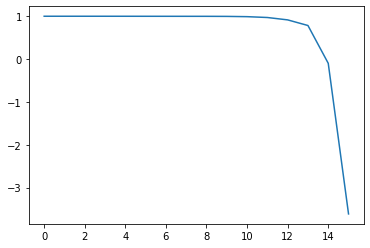

In [82]:
import matplotlib.pyplot as plt
plt.plot(R2_score)


In [69]:
metrics.r2_score(Y30_test,Y30_predict)

0.9898031532517483